In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
import common as cm

# Part 1: Information Gain

Important note: this exercise uses Pandas (for data manipulation and analysis) and Graphviz (for graph-drawing) libraries. 

This exercise consists of 3 parts. Complete the first part to get a mark of 3.0, the first two parts to get 4.0, complete all assignments to get 5.0. 

1.1 ) There are 10 objects (data) characterized with 5 binary attributes:

In [2]:
attributeNames = ["attr 1", "attr 2", "attr 3", "attr 4", "attr 5"]

data = pd.DataFrame(
    [
        [1, 0, 1, 1, 1],
        [1, 1, 0, 0, 1],
        [0, 1, 1, 1, 1],
        [1, 0, 1, 0, 1],
        [1, 0, 0, 1, 1],
        [0, 0, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 1, 1],
        [0, 1, 0, 0, 1],
        [0, 0, 0, 1, 1],
    ],
    columns=attributeNames,
)

1.2) Each object is assigned to either a class "0" or "1". The assignments are as follows (cl):

In [3]:
data["cl"] = [1, 1, 1, 0, 0, 1, 1, 1, 0, 0]

Hint: How one can read data (columns) in Pandas:

In [4]:
print(data["cl"])
print(list(data["cl"]))
print(set(data["cl"]))
print(data["attr 1"])

0    1
1    1
2    1
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: cl, dtype: int64
[1, 1, 1, 0, 0, 1, 1, 1, 0, 0]
{0, 1}
0    1
1    1
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: attr 1, dtype: int64


Hint: How split data (Pandas DataFrame) base on column:

In [5]:
data[data['cl']==0]

,attr 1,attr 2,attr 3,attr 4,attr 5,cl
3,1,0,1,0,1,0
4,1,0,0,1,1,0
8,0,1,0,0,1,0
9,0,0,0,1,1,0


Hint: How take values from column (Pandas Series):

In [6]:
for id, row in data['cl'].items():
    print(id,row)

0 1
1 1
2 1
3 0
4 0
5 1
6 1
7 1
8 0
9 0


1.3 )  Finish the below function for calculating entropy. $H(CL) = - \sum_{y \in CL}p(y)log_2p(y)$ It should return a value of entropy for an input vector CL. Assume that $log_2(0)$ is equal to 0.

In [7]:
def getEntropy(cl):
    if(len(cl) == 0):
        return 0
    zeros = 0
    ones = 0
    for i in cl:
        if(i==0):
            zeros+=1
        else:
            ones+=1
    sum = zeros + ones
    p0 = zeros/sum
    p1 = ones/sum
    #Omit the log(0) scenario
    if(p0==0 or p1==0):
        return 0
    else:
        entropy = - (p0*math.log(p0, 2) + p1*math.log(p1, 2))
        return entropy 

1.4 ) Calculate the entropy for the CL vector  (the result should be 0.97095...):

In [8]:
print(getEntropy(data['cl']))

0.9709505944546686


1.5) Finish the below function for calculating a conditional entropy: $H(CL|X) = - \sum_{x \in X} \sum_{y \in CL} p(x,y) log_2 \frac{p(x,y)}{p(x)}$. Assume that $log_2(0)$ is equal to 0 and if $p(x) = 0$, $\frac{p(x,y)}{p(x)}$ is equal to 0 as well.

In [9]:
def getConditionalEntropy(cl, attr):
    size = len(cl)
    frame = pd.DataFrame()
    frame["cl"] = cl
    frame["attr"] = attr
    zeroFrame = frame[frame['attr'] == 0]
    oneFrame = frame[frame['attr'] == 1]
    p0 = len(zeroFrame) / size
    p1 = len(oneFrame) / size
    entropy = p0 * getEntropy(zeroFrame["cl"]) + p1 * getEntropy(oneFrame["cl"])
    return entropy
    
    ### return 0

1.6 ) Calculate conditional entropies for given attribiutes.

In [10]:
print(getConditionalEntropy(data["cl"], data["attr 1"])) ### the result should be 0.95097...
print(getConditionalEntropy(data["cl"], data["attr 5"])) ### the result should be 0.97095...

0.9509775004326937
0.9709505944546686


1.7 ) **Question: Which entropy is lesser and why?**

Answer: The conditional entropy for attribute 1 is slightly lesser, because it divides the data into slightly more ordered subsets. (Actually attribute 5 doesn't divide at all since it contains all '1's). However, as we will see in the following exercise, the information gain is still mariginal.

1.8) Finish the below function for calculating information gain (use getEntropy() and getConditionalEntropy() functions):

In [11]:
def getInformationGain(cl, attr):
    return getEntropy(cl) - getConditionalEntropy(cl, attr)

In [12]:
print(getInformationGain(data["cl"], data["attr 1"]))
print(getInformationGain(data["cl"], data["attr 5"]))

0.01997309402197489
0.0


1.9) **Question: Which IG is lesser and why?**

Answer: Information Gain for attribute 5 is lesser (0.0), since this particular attribute doesn't help in ordering the dataset. Every item in the data has the same value for attribute 5. <br>
IG for attribute 1 isn't a lot as well, but at least it slightly helps with ordering.

# Part 2: ID3 algorithm

Decision tree consists of decision nodes and leaves. Nodes split data while leaves classify objects. Consider the class "Node" provided below. It consists of 4 fields:
- attr - attribute ID (use the names in attributeNames vector)
- left - left branch, i.e., a reference to other node
- right - right branch, i.e., a reference to other node
- value - a decision. If node = None, then the node is not a leaf. If value is not None, then a node is considered a leaf. 

Method __call__ returns the decision if the node is a leaf (i.e., when value is not None). 
Otherwise, it calls either the left or the right branch of an input object, based on the attribute value (0 -> left children; 1 -> right children). In this way, we can traverse the decision tree in order to find the final decision.

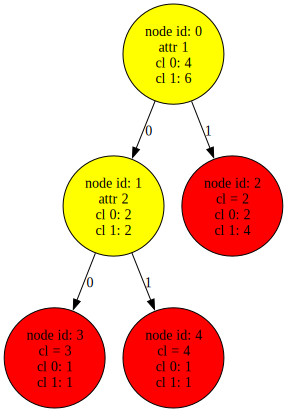

In [13]:
class Node:
    def __init__(self, attr, left, right, value):
        self.attr = attr
        self.left = left
        self.right = right
        self.value = value

    def __call__(self, obj):
        if self.value is None:
            if obj[self.attr] == 0:
                return self.left(obj)
            else:
                return self.right(obj)
        else:
            return self.value
        
### EXAMPLE
def example(obj):
    root = Node("attr 1", None, None, None) ###  IN ROOT SPLIT ON 1ST (0) ATTRIBUTE
    lChildren = Node("attr 2", None, None, None) ### IN ROOT's LEFT CHILDREN SPLIT ON 2ND (1) ATTRIBUTE
    rChildren = Node(None, None, None, 2) ### IN ROOT's RIGHT CHILDREN -> DECISION = 2
    root.left = lChildren
    root.right = rChildren
    llChildren = Node(None, None, None, 3) ### IN ROOT's LEFT-LEFT CHILDREN -> DECISION = 3
    lrChildren = Node(None, None, None, 4) ### IN ROOT's LEFT-RIGHT CHILDREN -> DECISION = 4
    lChildren.left = llChildren
    lChildren.right = lrChildren
    #Corrected return statement
    return root
    
root = example(pd.Series([0,0],['attr 1','attr 2'])) ### ROOT : FIRST ATTRIBUTE = 0 SO WE GO TO LEFT CHILDREN.
### IT IS A LEAF WITH THE DECISION = 3
### THEN, IN THE CORRESPONDING CHILDREN, THE SECOND ATTRIBUTE = 0, SO WE GO TO LEFT-LEFT CHILDREN
cm.printGraph(root,data)

example({'attr 1':0,'attr 2':1})
example(pd.Series([1,0],['attr 1','attr 2']))
example({'attr 1':1,'attr 2':1})

2.1) Create an initial root. Set the value (decision) to 1. 

In [14]:
root = Node(None, None, None, 1)

2.2) Use a getErrorRate method in common.py auxiliary file to calculate the error rate. The decision is made based on the majority rule. In case of tie, the method takes 0 as the default class.

In [15]:
print(cm.getErrorRate(root, data))

0.4


2.3) Use printGraph method (see the common.py file) to draw the decision tree and save it in a png file.

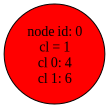

In [16]:
cm.printGraph(root, data)
#Use this in the function to save to a file:
#dgraph.view(cleanup=True)

2.4) Calculate information gain for all attribiutes.

In [17]:
def printInformationGain(data):
    for attribute_name in attributeNames:
        print(attribute_name, "gain equals:", getInformationGain(data["cl"], data[attribute_name]))
        
printInformationGain(data)

attr 1 gain equals: 0.01997309402197489
attr 2 gain equals: 0.0464393446710154
attr 3 gain equals: 0.12451124978365313
attr 4 gain equals: 0.0912774462416801
attr 5 gain equals: 0.0


2.5) Choose the best attribute to split the data (HINT, it should be the third attribute :)). Construct two new nodes: one for $x_i$ = 0 decision and the second for $x_i$ = 1; connect them with the root (left and right branch). Remember to update the root. 

In [18]:
root = Node("attr 3", None, None, None)
lChild = Node(None, None, None, 0)
rChild = Node(None, None, None, 1)
root.left = lChild
root.right = rChild

2.6) Print the graph and calculate the error rate. What happened with the error rate?

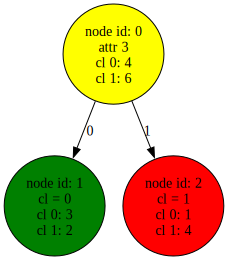

0.30


In [19]:
cm.printGraph(root, data)
print(f"{cm.getErrorRate(root, data):.2f}")

Answer: The error rate decreased.

2.7) Split the 'data' (table) based on the selected attribiute, i.e., create two new tables.

In [20]:
left_data = data[data["attr 3"] == 0]
right_data = data[data["attr 3"] == 1]

2.8) Let us start with the left node. Firstly, calculate information gain for this node.

In [21]:
printInformationGain(left_data)

attr 1 gain equals: 0.4199730940219749
attr 2 gain equals: 0.01997309402197489
attr 3 gain equals: 0.0
attr 4 gain equals: 0.01997309402197489
attr 5 gain equals: 0.0


2.9) Choose the best attribute to split the data and then update the decision tree.

In [22]:
lChild = Node("attr 1", None, None, None)
llChild = Node(None, None, None, 0)
lrChild = Node(None, None, None, 1)
lChild.left = llChild
lChild.right = lrChild
root.left=lChild

2.10) Print the graph and calculate the error rate (HINT: should be 0.2 :). What happened with the error rate?

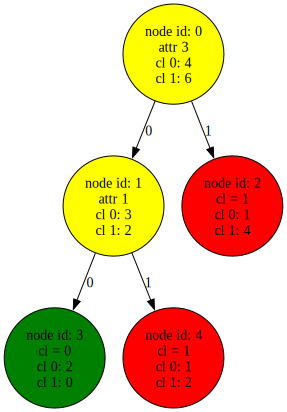

0.20


In [23]:
cm.printGraph(root, data)
print(f"{cm.getErrorRate(root, data):.2f}")

Answer: Error rate still decreases

2.11) Split data (remember that we split left_data, not data).

In [24]:
leftLeft_data = left_data[left_data["attr 1"] == 0]
leftRight_data = left_data[left_data["attr 1"] == 1]

2.12) Repeat the whole process for the right node.

In [25]:
printInformationGain(right_data)

attr 1 gain equals: 0.17095059445466865
attr 2 gain equals: 0.17095059445466865
attr 3 gain equals: 0.0
attr 4 gain equals: 0.7219280948873623
attr 5 gain equals: 0.0


In [26]:
rChild = Node("attr 4", None, None, None)
rlChild = Node(None, None, None, 0)
rrChild = Node(None, None, None, 1)
rChild.left = rlChild
rChild.right = rrChild
root.right=rChild

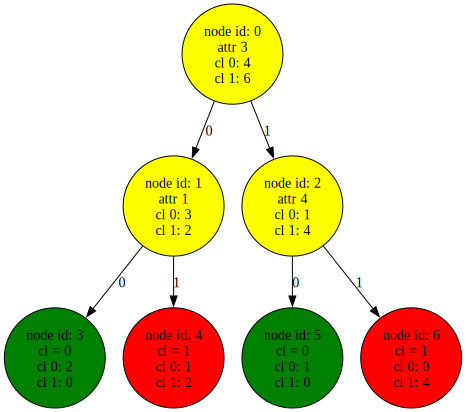

0.10


In [27]:
cm.printGraph(root, data)
print(f"{cm.getErrorRate(root, data):.2f}")

In [28]:
rightLeft_data = right_data[right_data["attr 4"] == 0]
rightRight_data = right_data[right_data["attr 4"] == 1]

2.13) Let's consider left-left node. Calculate information gain for it.

In [29]:
printInformationGain(leftLeft_data)

attr 1 gain equals: 0.0
attr 2 gain equals: 0.0
attr 3 gain equals: 0.0
attr 4 gain equals: 0.0
attr 5 gain equals: 0.0


2.14) Will adding a new node to the tree improve its effectiveness? Why? Why not?

Answer: No, it won't, because adding a new node wouldn't give the tree any information gain.

2.15) Calculate information gain for the left-right node.

In [30]:
printInformationGain(leftRight_data)

attr 1 gain equals: 0.0
attr 2 gain equals: 0.2516291673878229
attr 3 gain equals: 0.0
attr 4 gain equals: 0.2516291673878229
attr 5 gain equals: 0.0


In [31]:
lrChild = Node("attr 2", None, None, None)
lrlChild = Node(None, None, None, 0)
lrrChild = Node(None, None, None, 1)
lrChild.left = lrlChild
lrChild.right = lrrChild
lChild.right=lrChild

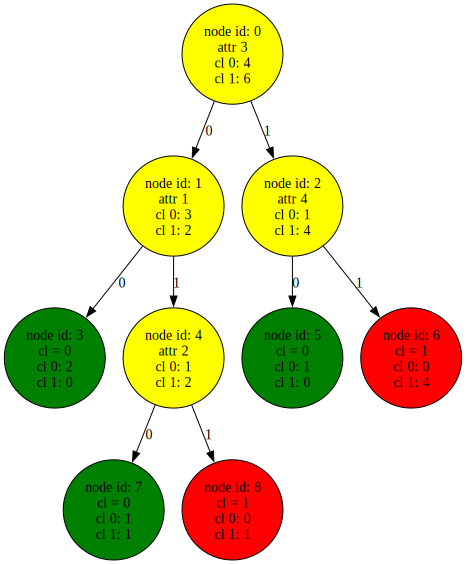

0.10


In [32]:
cm.printGraph(root, data)
print(f"{cm.getErrorRate(root, data):.2f}")

2.16) What happened with the error rate? Is it necessary to keep these two newly added leaves?

Answer: Error rate didn't improve, therefore we can trim those newly added tree.

2.17) Finish creating the right side of the tree

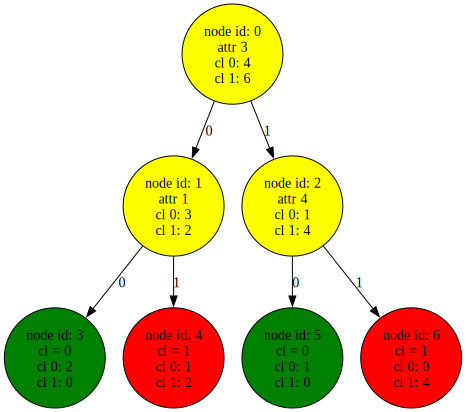

0.10


In [33]:
### I may have misunderstood the exercises before, but the right branch is already completed.
### Therefore I will just trim those unnecessary newly created 2 nodes.
lrChild = Node(None, None, None, 1)
lChild.right=lrChild
cm.printGraph(root, data)
print(f"{cm.getErrorRate(root, data):.2f}")

# Part 3: automated construction of decision trees

3.1 Complete the following function for automated construct of decision trees, so that it returns a decision tree for the given data and attribute list. Note that this is a recusive method, i.e., calls itself.

In [62]:
max_depth = 10

In [87]:
def maxArgInformationGain(data, attributeNames):
    max_gain = float('-inf')
    max_arg = None

    for attribute_name in attributeNames:
        gain = getInformationGain(data["cl"], data[attribute_name])
        if gain > max_gain:
            max_gain = gain
            max_arg = attribute_name

    return max_arg, max_gain

In [138]:
def splitTree(current_node, current_data, attributeNames, depth):
    #Don't go further than the desired depth
    if(depth > max_depth):
        return current_node
    else:
        #print(depth)
        #print(current_data)
        #print()
        arg, gain = maxArgInformationGain(current_data, attributeNames)
        #Don't split further if there is no gain
        if(gain == 0):
            return current_node
        #Compute number of misclassified nodes in this subtree
        misclassified = len(current_data) - len(current_data[current_data["cl"] == current_node.value])
        left_data = current_data[current_data[arg] == 0]
        right_data = current_data[current_data[arg] == 1]
        #Compute how many samples would still be missclassified after split
        new_misclassified = 0
        #Left subtree
        left_size = len(left_data)
        ones = len(left_data[left_data["cl"] == 1])
        zeros = left_size - ones
        if zeros > ones:
            decision_left = 0
            new_misclassified += ones
        else :
            decision_left = 1
            new_misclassified += zeros
        leftChild = Node(None, None, None, decision_left)
        #Right subtree
        right_size = len(right_data)
        ones = len(right_data[right_data["cl"] == 1])
        zeros = right_size - ones
        if zeros > ones:
            decision_right = 0
            new_misclassified += ones
        else :
            decision_right = 1
            new_misclassified += zeros
        rightChild = Node(None, None, None, decision_right)
        #Decide if we need to split
        #Misclassified is actually Error_rate/len(data)
        #Therefore comparing these variables is equivalent to comparing error rates
        if(new_misclassified < misclassified):
            #Split recursively
            if(len(left_data) > 0):
                leftChild = splitTree(leftChild, left_data, attributeNames, depth + 1)
            if(len(right_data) > 0):
                rightChild = splitTree(rightChild, right_data, attributeNames, depth + 1)
            #Return this node
            current_node = Node(arg, leftChild, rightChild, None)
            return current_node
        else:
            return current_node

def createTree(data, attributeNames, depth=0):
    data = data.reset_index().drop("index", axis=1)
    root = Node(None, None, None, 1)
    return splitTree(root, data, attributeNames, 0) 
    

3.2) Build a decision tree for a training dataset in the common.py auxiliary file, for diffrent values of max_depth.  Calculate & compare the error rates for training and validation datasets.

In [126]:
max_depth = 10

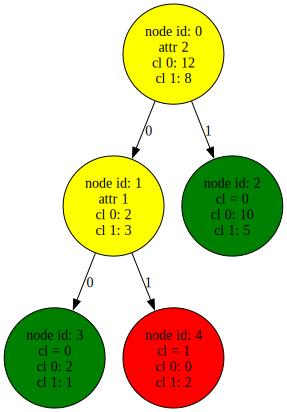

0.30


In [139]:
# Training dataset
train_attributeNames, train_data = cm.getTrainingDataSet()
root = createTree(train_data, train_attributeNames, 0)
cm.printGraph(root, train_data)
print(f"{cm.getErrorRate(root, train_data):.2f}")

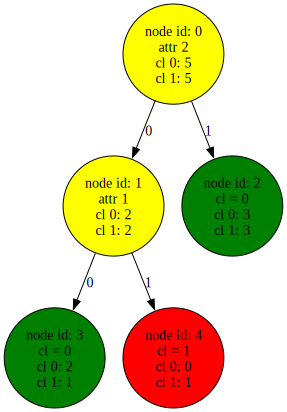

0.40


In [128]:
# Validation dataset
valid_attributeName, valid_data = cm.getValidationDataSet()
cm.printGraph(root, valid_data)
print(f"{cm.getErrorRate(root, valid_data):.2f}")

3.3) Consider only the training data set and answer the following questions:
* What is the miximum depth of the tree (consider only the training data set)?
* The tree building process should stop when there is no improvement in error rate (why?). Check for which value of "max_dept" there is no improvement in error rate. 

In [129]:
for i in range(10):
    max_depth = i
    root = createTree(train_data, train_attributeNames, max_depth)
    print(f"Max depth: {i} results in error rate: {cm.getErrorRate(root, valid_data):.2f}")
    
    

Max depth: 0 results in error rate: 0.50
Max depth: 1 results in error rate: 0.40
Max depth: 2 results in error rate: 0.40
Max depth: 3 results in error rate: 0.40
Max depth: 4 results in error rate: 0.40
Max depth: 5 results in error rate: 0.40
Max depth: 6 results in error rate: 0.40
Max depth: 7 results in error rate: 0.40
Max depth: 8 results in error rate: 0.40
Max depth: 9 results in error rate: 0.40


There is no improvement for max_depth = 1. This particular testing data seems to contain a lot of duplicates belonging to different classes, therefore the entire usage of decision tree for this particular example might be questionable.